In [12]:
import numpy as np
import matplotlib.pyplot as plt
import arff
import os

In [13]:
def get_arff_data_labels(filename): 
    arff_content = arff.load(f.replace(',\n','\n') for f in open(filename, 'r'))
    data = arff_content['data']
    X = np.array([i[:1] for i in data])
    y = np.array([i[-1] for i in data])
    return X, y.astype(float)

In [49]:
def plot_anomaly(X, y, marker="-"):
    plt.figure(figsize=(12,2))
    plt.plot(np.arange(0,X.shape[0]), X, f"{marker}b")
    anomalous = np.multiply(np.reshape(y,(y.shape[0],1)),X)
    plt.plot(np.arange(0,X.shape[0]), np.where(anomalous!=0, anomalous, None), f"{marker}r")

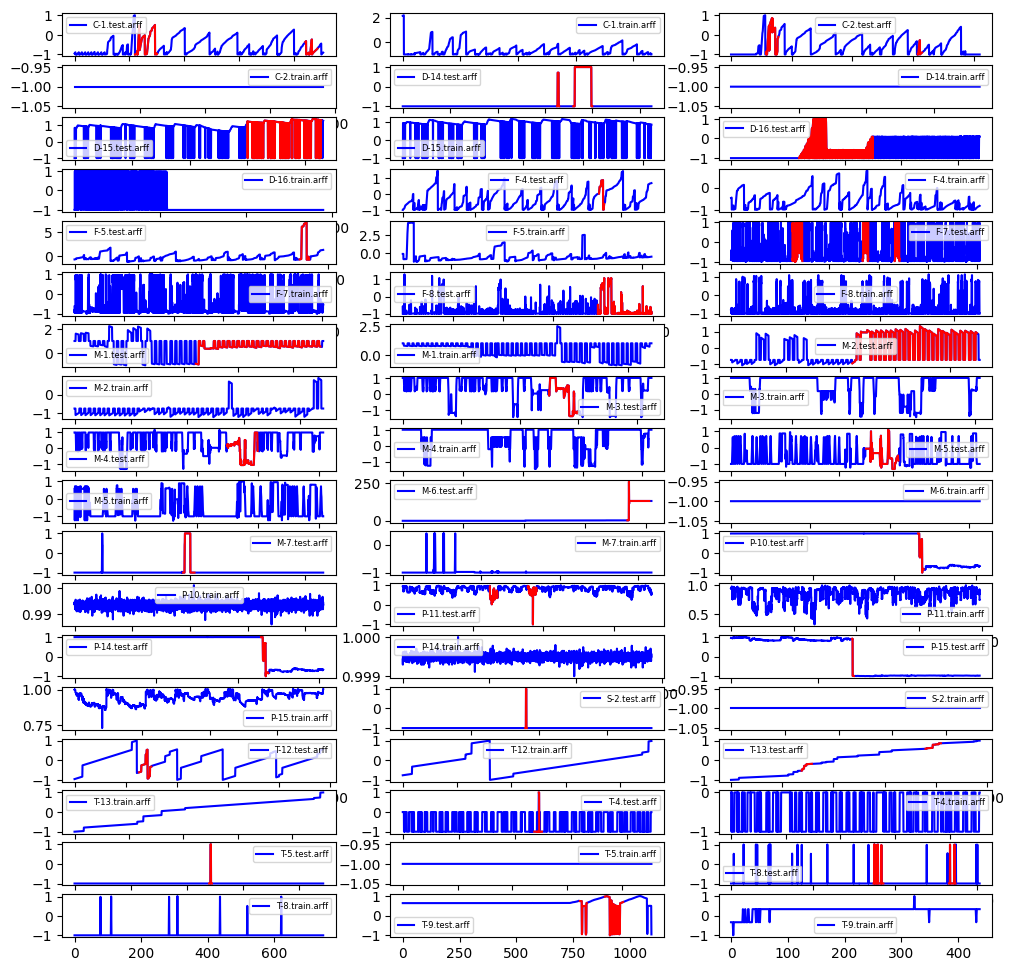

In [6]:
# plotting NASA-MSL
directory = "/Users/tammyz/Desktop/3H03/AnomalyDriftDetection/data/benchmark/NASA-MSL"
files = os.listdir(directory)
files.sort()
fig, ax = plt.subplots(len(files)//3,3,figsize=(12,12))
for i in range(len(files)):
    X, y = get_arff_data_labels(os.path.join(directory, files[i]))
    anomalous = np.multiply(np.reshape(y,(y.shape[0],1)),X)
    ax[i//3][i%3].plot(np.arange(0,X.shape[0]), X, color="blue", label=files[i])
    ax[i//3][i%3].plot(np.arange(0,X.shape[0]), np.where(anomalous!=0, anomalous, None), color="red")
    ax[i//3][i%3].legend(fontsize="6")

file_1 shape: (2264, 1) 	 file_2 shape: (2051, 1)


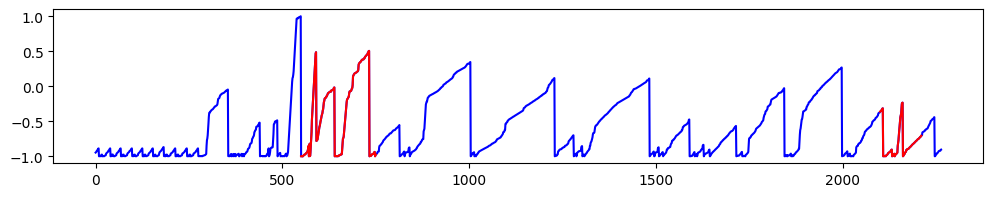

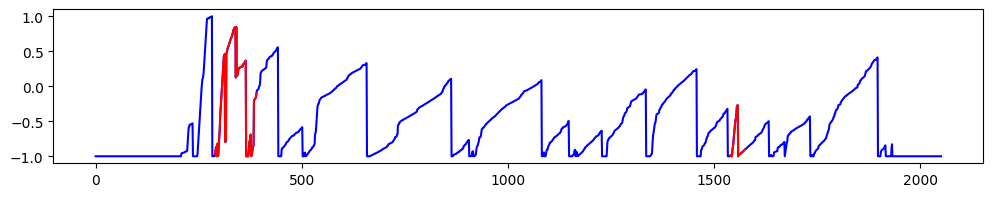

In [50]:
file_1 = "data/benchmark/NASA-MSL/C-1.test.arff"
X_1, y_1 = get_arff_data_labels(file_1)
file_2 = "data/benchmark/NASA-MSL/C-2.test.arff"
X_2, y_2 = get_arff_data_labels(file_2)
print(f"file_1 shape: {X_1.shape} \t file_2 shape: {X_2.shape}")
plot_anomaly(X_1,y_1)
plot_anomaly(X_2,y_2)

In [20]:
!cd ~/Desktop/3H03/moa-release-2023.04.0/lib && java -cp moa.jar -javaagent:sizeofag-1.0.4.jar moa.DoTask "WriteStreamToARFFFile  -s (ConceptDriftStream -s (ArffFileStream -f /Users/tammyz/Desktop/3H03/AnomalyDriftDetection/data/benchmark/NASA-MSL/C-2.test.arff -c 0) -d (ArffFileStream -f /Users/tammyz/Desktop/3H03/AnomalyDriftDetection/data/benchmark/NASA-MSL/C-1.test.arff -c 0) -p 1250 -w 500) -f /Users/tammyz/Desktop/3H03/AnomalyDriftDetection/data/synthetic/NASA-MSL/C-2-1.test.arff -m 4000"


{M}assive {O}nline {A}nalysis
Version:  23.04 April 2023
Copyright: (C) 2007-2023 University of Waikato, Hamilton, New Zealand
Web: http://moa.cms.waikato.ac.nz/

                                                                               
Task completed in 0.13s (CPU time)

Stream written to ARFF file /Users/tammyz/Desktop/3H03/AnomalyDriftDetection/data/synthetic/NASA-MSL/C-2-1.test.arff


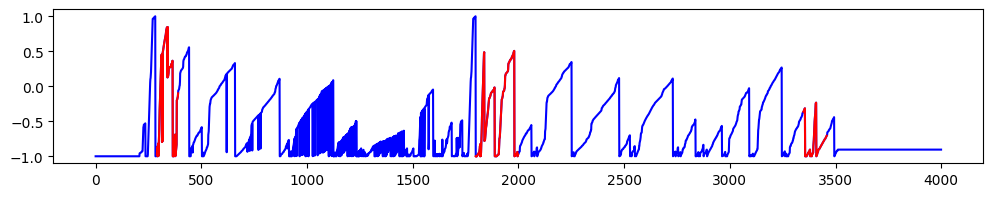

In [21]:
drift_file = "data/synthetic/NASA-MSL/C-2-1.test.arff"
X_drift, y_drift = get_arff_data_labels(drift_file)
plot_anomaly(X_drift, y_drift)

- Expected anomaly around 1500 from stream 1 (C-2), not present
- Remaining anomalies in second stream appear the same

file_1 shape: (2217, 1) 	 file_2 shape: (1519, 1)


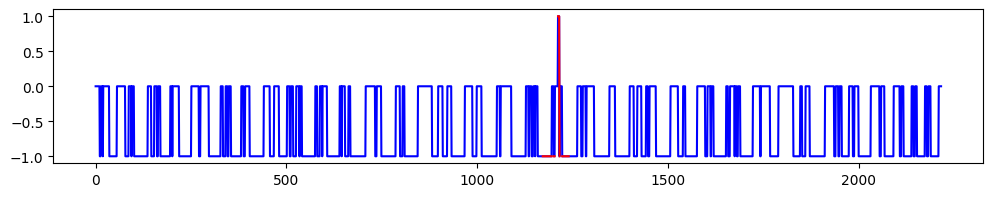

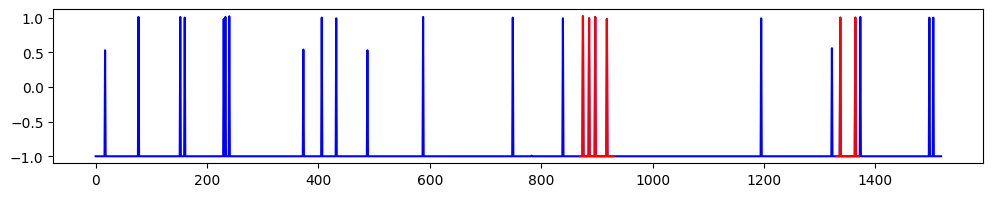

In [46]:
file_1 = "data/benchmark/NASA-MSL/T-4.test.arff"
X_1, y_1 = get_arff_data_labels(file_1)
file_2 = "data/benchmark/NASA-MSL/T-8.test.arff"
X_2, y_2 = get_arff_data_labels(file_2)
print(f"file_1 shape: {X_1.shape} \t file_2 shape: {X_2.shape}")
plot_anomaly(X_1, y_1)
plot_anomaly(X_2, y_2)

In [10]:
!cd ~/Desktop/3H03/moa-release-2023.04.0/lib && java -cp moa.jar -javaagent:sizeofag-1.0.4.jar moa.DoTask "WriteStreamToARFFFile  -s (ConceptDriftStream -s (ArffFileStream -f /Users/tammyz/Desktop/3H03/AnomalyDriftDetection/data/benchmark/NASA-MSL/T-4.test.arff -c 0) -d (ArffFileStream -f /Users/tammyz/Desktop/3H03/AnomalyDriftDetection/data/benchmark/NASA-MSL/T-8.test.arff -c 0) -p 800 -w 500) -f /Users/tammyz/Desktop/3H03/AnomalyDriftDetection/data/synthetic/NASA-MSL/T-4-8.test.arff -m 3500"


{M}assive {O}nline {A}nalysis
Version:  23.04 April 2023
Copyright: (C) 2007-2023 University of Waikato, Hamilton, New Zealand
Web: http://moa.cms.waikato.ac.nz/

                                                                               
Task completed in 0.09s (CPU time)

Stream written to ARFF file /Users/tammyz/Desktop/3H03/AnomalyDriftDetection/data/synthetic/NASA-MSL/T-4-8.test.arff


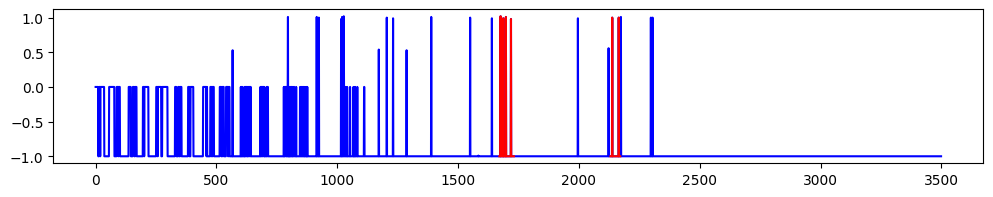

In [26]:
drift_file = "data/synthetic/NASA-MSL/T-4-8.test.arff"
X_drift, y_drift = get_arff_data_labels(drift_file)
plot_anomaly(X_drift, y_drift)

- Expected anomaly around 800 from stream 1, not present
- Seems to have trailing 0 values at end of drift, consistent with length of first stream (800 due to drift) + drift length (500) + length of second stream (1519)

file_1 shape: (3922, 1) 	 file_2 shape: (5054, 1)


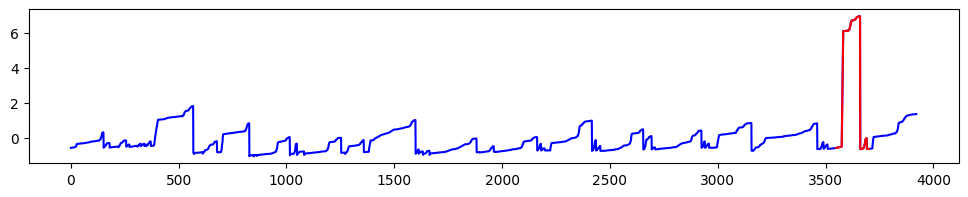

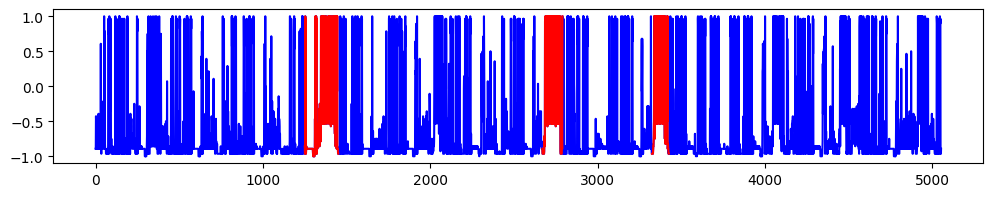

In [28]:
file_1 = "data/benchmark/NASA-MSL/F-5.test.arff"
X_1, y_1 = get_arff_data_labels(file_1)
file_2 = "data/benchmark/NASA-MSL/F-7.test.arff"
X_2, y_2 = get_arff_data_labels(file_2)
print(f"file_1 shape: {X_1.shape} \t file_2 shape: {X_2.shape}")
plot_anomaly(X_1, y_1)
plot_anomaly(X_2, y_2)

In [29]:
!cd ~/Desktop/3H03/moa-release-2023.04.0/lib && java -cp moa.jar -javaagent:sizeofag-1.0.4.jar moa.DoTask "WriteStreamToARFFFile  -s (ConceptDriftStream -s (ArffFileStream -f /Users/tammyz/Desktop/3H03/AnomalyDriftDetection/data/benchmark/NASA-MSL/F-5.test.arff -c 0) -d (ArffFileStream -f /Users/tammyz/Desktop/3H03/AnomalyDriftDetection/data/benchmark/NASA-MSL/F-7.test.arff -c 0) -p 3500 -w 500) -f /Users/tammyz/Desktop/3H03/AnomalyDriftDetection/data/synthetic/NASA-MSL/F-5-7.test.arff -m 8500"


{M}assive {O}nline {A}nalysis
Version:  23.04 April 2023
Copyright: (C) 2007-2023 University of Waikato, Hamilton, New Zealand
Web: http://moa.cms.waikato.ac.nz/

                                                                               
Task completed in 0.18s (CPU time)

Stream written to ARFF file /Users/tammyz/Desktop/3H03/AnomalyDriftDetection/data/synthetic/NASA-MSL/F-5-7.test.arff


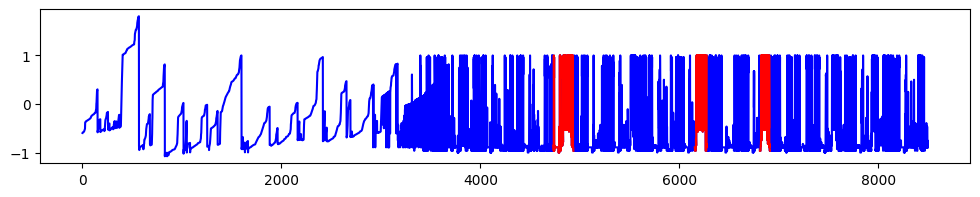

In [43]:
drift_file = "data/synthetic/NASA-MSL/F-5-7.test.arff"
X_drift, y_drift = get_arff_data_labels(drift_file)
plot_anomaly(X_drift, y_drift)

- Expected drift around 3500, looks like it disappeared due to overlapping drift

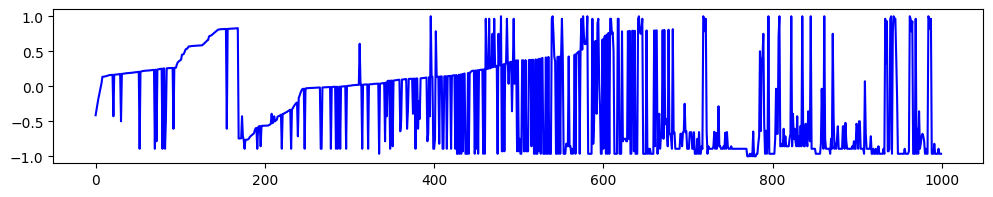

In [44]:
plot_anomaly(X_drift[3000:4000], y_drift[3000:4000])

In [33]:
!cd ~/Desktop/3H03/moa-release-2023.04.0/lib && java -cp moa.jar -javaagent:sizeofag-1.0.4.jar moa.DoTask "WriteStreamToARFFFile  -s (ConceptDriftStream -s (ArffFileStream -f /Users/tammyz/Desktop/3H03/AnomalyDriftDetection/data/benchmark/NASA-MSL/F-5.test.arff -c 0) -d (ArffFileStream -f /Users/tammyz/Desktop/3H03/AnomalyDriftDetection/data/benchmark/NASA-MSL/F-7.test.arff -c 0) -p 4000 -w 100) -f /Users/tammyz/Desktop/3H03/AnomalyDriftDetection/data/synthetic/NASA-MSL/F-5-7_1.test.arff -m 8500"


{M}assive {O}nline {A}nalysis
Version:  23.04 April 2023
Copyright: (C) 2007-2023 University of Waikato, Hamilton, New Zealand
Web: http://moa.cms.waikato.ac.nz/

                                                                               
Task completed in 0.19s (CPU time)

Stream written to ARFF file /Users/tammyz/Desktop/3H03/AnomalyDriftDetection/data/synthetic/NASA-MSL/F-5-7_1.test.arff


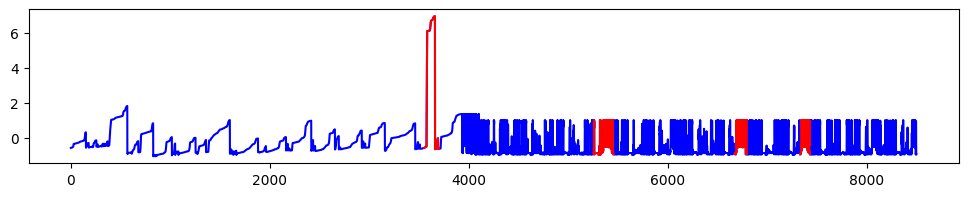

In [34]:
drift_file = "data/synthetic/NASA-MSL/F-5-7_1.test.arff"
X_drift, y_drift = get_arff_data_labels(drift_file)
plot_anomaly(X_drift, y_drift) 

file_1 shape: (2038, 1) 	 file_2 shape: (2303, 1)


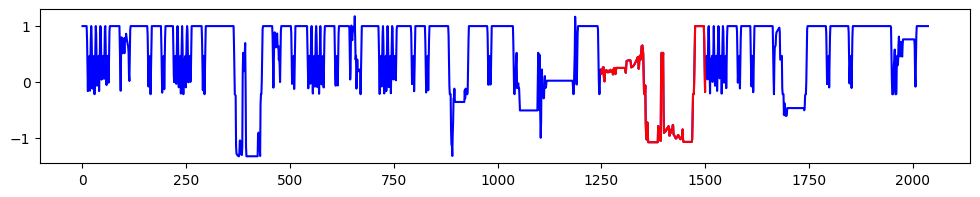

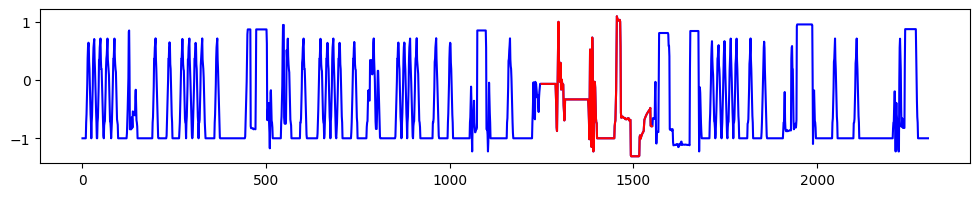

In [37]:
file_1 = "data/benchmark/NASA-MSL/M-4.test.arff"
X_1, y_1 = get_arff_data_labels(file_1)
file_2 = "data/benchmark/NASA-MSL/M-5.test.arff"
X_2, y_2 = get_arff_data_labels(file_2)
print(f"file_1 shape: {X_1.shape} \t file_2 shape: {X_2.shape}")
plot_anomaly(X_1, y_1)
plot_anomaly(X_2, y_2)

In [39]:
!cd ~/Desktop/3H03/moa-release-2023.04.0/lib && java -cp moa.jar -javaagent:sizeofag-1.0.4.jar moa.DoTask "WriteStreamToARFFFile  -s (ConceptDriftStream -s (ArffFileStream -f /Users/tammyz/Desktop/3H03/AnomalyDriftDetection/data/benchmark/NASA-MSL/M-4.test.arff -c 0) -d (ArffFileStream -f /Users/tammyz/Desktop/3H03/AnomalyDriftDetection/data/benchmark/NASA-MSL/M-5.test.arff -c 0) -p 1300 -w 500) -f /Users/tammyz/Desktop/3H03/AnomalyDriftDetection/data/synthetic/NASA-MSL/M-4-5.test.arff -m 4000"


{M}assive {O}nline {A}nalysis
Version:  23.04 April 2023
Copyright: (C) 2007-2023 University of Waikato, Hamilton, New Zealand
Web: http://moa.cms.waikato.ac.nz/

                                                                               
Task completed in 0.13s (CPU time)

Stream written to ARFF file /Users/tammyz/Desktop/3H03/AnomalyDriftDetection/data/synthetic/NASA-MSL/M-4-5.test.arff


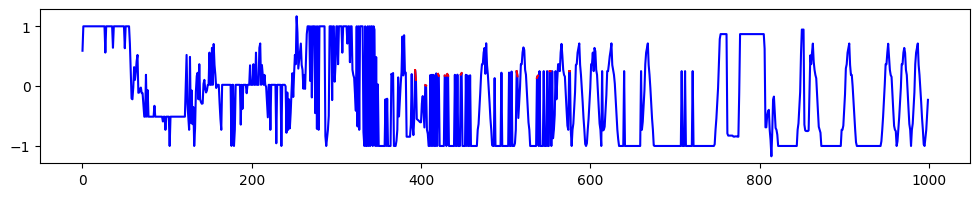

In [42]:
drift_file = "data/synthetic/NASA-MSL/M-4-5.test.arff"
X_drift, y_drift = get_arff_data_labels(drift_file)
plot_anomaly(X_drift[1000:2000], y_drift[1000:2000])